In [1]:
!ls

cfgs			README.md		       Untitled1.ipynb
data			samples			       Untitled2.ipynb
demo_net.py		test_net.py		       Untitled3.ipynb
demo_tiny_resnet101.sh	tiny_resnet101_eval.sh	       Untitled.ipynb
__init__.py		tiny_resnet101_wider_train.sh
lib			train_net.py


# Basic setup

Ensure you run the notebook using `conda_tensorflow_p27` kernel!

## Download WIDER Face Training and Validation datasets

Download the training set (1.4Gb):

In [2]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=0B6eKvaijfFUDQUUwd21EckhUbWs' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=0B6eKvaijfFUDQUUwd21EckhUbWs" -O WIDER-training.zip && rm -rf /tmp/cookies.txt

--2020-02-25 12:22:14--  https://docs.google.com/uc?export=download&confirm=p_88&id=0B6eKvaijfFUDQUUwd21EckhUbWs
Resolving docs.google.com (docs.google.com)... 74.125.193.100, 74.125.193.113, 74.125.193.139, ...
Connecting to docs.google.com (docs.google.com)|74.125.193.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-10-24-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/2jh6448dkdohconbdsftjtodimrvima3/1582632900000/13356917703944334611/*/0B6eKvaijfFUDQUUwd21EckhUbWs?e=download [following]
--2020-02-25 12:22:14--  https://doc-10-24-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/2jh6448dkdohconbdsftjtodimrvima3/1582632900000/13356917703944334611/*/0B6eKvaijfFUDQUUwd21EckhUbWs?e=download
Resolving doc-10-24-docs.googleusercontent.com (doc-10-24-docs.googleusercontent.com)... 74.125.193.132, 2a00:1450:400b:c02::84
Connecting to doc-10-24-docs.googleusercontent.com (doc-10-24-doc

Download the validation set (346Mb):

In [3]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=0B6eKvaijfFUDd3dIRmpvSk8tLUk' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=0B6eKvaijfFUDd3dIRmpvSk8tLUk" -O WIDER-validation.zip && rm -rf /tmp/cookies.txt

--2020-02-25 12:25:39--  https://docs.google.com/uc?export=download&confirm=eZIz&id=0B6eKvaijfFUDd3dIRmpvSk8tLUk
Resolving docs.google.com (docs.google.com)... 74.125.193.102, 74.125.193.138, 74.125.193.100, ...
Connecting to docs.google.com (docs.google.com)|74.125.193.102|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-04-8o-docs.googleusercontent.com/docs/securesc/nb8bdk7rta9h4gmui9tmi89vlko3uvhu/tuuvc6g1gq4bg9u1jncg0ge9mktktq2j/1582632900000/13356917703944334611/06451287425654851032Z/0B6eKvaijfFUDd3dIRmpvSk8tLUk?e=download [following]
--2020-02-25 12:25:40--  https://doc-04-8o-docs.googleusercontent.com/docs/securesc/nb8bdk7rta9h4gmui9tmi89vlko3uvhu/tuuvc6g1gq4bg9u1jncg0ge9mktktq2j/1582632900000/13356917703944334611/06451287425654851032Z/0B6eKvaijfFUDd3dIRmpvSk8tLUk?e=download
Resolving doc-04-8o-docs.googleusercontent.com (doc-04-8o-docs.googleusercontent.com)... 74.125.193.132, 2a00:1450:400b:c03::84
Connecting to doc-04-8o-d

Download the testing set (1.7Gb):

In [4]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=0B6eKvaijfFUDbW4tdGpaYjgzZkU' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=0B6eKvaijfFUDbW4tdGpaYjgzZkU" -O WIDER-testing.zip && rm -rf /tmp/cookies.txt

--2020-02-25 12:26:57--  https://docs.google.com/uc?export=download&confirm=4JfT&id=0B6eKvaijfFUDbW4tdGpaYjgzZkU
Resolving docs.google.com (docs.google.com)... 74.125.193.139, 74.125.193.101, 74.125.193.102, ...
Connecting to docs.google.com (docs.google.com)|74.125.193.139|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-10-00-docs.googleusercontent.com/docs/securesc/7quvj4giodbroehtout79u8e4c7f7tn0/seb5nb7nql28sm72gde2osnb4qppin0v/1582632900000/13356917703944334611/10795033024103955038Z/0B6eKvaijfFUDbW4tdGpaYjgzZkU?e=download [following]
--2020-02-25 12:26:58--  https://doc-10-00-docs.googleusercontent.com/docs/securesc/7quvj4giodbroehtout79u8e4c7f7tn0/seb5nb7nql28sm72gde2osnb4qppin0v/1582632900000/13356917703944334611/10795033024103955038Z/0B6eKvaijfFUDbW4tdGpaYjgzZkU?e=download
Resolving doc-10-00-docs.googleusercontent.com (doc-10-00-docs.googleusercontent.com)... 74.125.193.132, 2a00:1450:400b:c01::84
Connecting to doc-10-00-d

Ensure we run Python 2:

In [6]:
!python --version

Python 2.7.15


Download faces split:

In [8]:
!wget http://mmlab.ie.cuhk.edu.hk/projects/WIDERFace/support/bbx_annotation/wider_face_split.zip

--2020-02-25 12:33:56--  http://mmlab.ie.cuhk.edu.hk/projects/WIDERFace/support/bbx_annotation/wider_face_split.zip
Resolving mmlab.ie.cuhk.edu.hk (mmlab.ie.cuhk.edu.hk)... 137.189.99.12
Connecting to mmlab.ie.cuhk.edu.hk (mmlab.ie.cuhk.edu.hk)|137.189.99.12|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3591642 (3.4M) [application/zip]
Saving to: ‘wider_face_split.zip’

wider_face_split.zi 100%[===================>]   3.42M  2.17MB/s    in 1.6s    

2020-02-25 12:33:59 (2.17 MB/s) - ‘wider_face_split.zip’ saved [3591642/3591642]



Extract the downloaded data sets according to Tiny Faces <https://github.com/Timforce/tiny-tf> expectations:

In [9]:
!mkdir WIDER

In [10]:
!unzip wider_face_split.zip -d WIDER

Archive:  wider_face_split.zip
   creating: WIDER/wider_face_split/
  inflating: WIDER/wider_face_split/readme.txt  
  inflating: WIDER/wider_face_split/wider_face_test.mat  
  inflating: WIDER/wider_face_split/wider_face_test_filelist.txt  
  inflating: WIDER/wider_face_split/wider_face_train.mat  
  inflating: WIDER/wider_face_split/wider_face_train_bbx_gt.txt  
  inflating: WIDER/wider_face_split/wider_face_val.mat  
  inflating: WIDER/wider_face_split/wider_face_val_bbx_gt.txt  


In [16]:
!for i in `ls WIDER-*`; do unzip -oq "$i" -d WIDER; done

## Bulid two pickle files based on training and validation dataset

In [17]:
!python lib/utils/wider2pkl_detail.py --img_root WIDER/WIDER_train/images --label WIDER/wider_face_split/wider_face_train.mat --out wider_train_roidb_detail.pkl 

Wrote gt roidb to wider_train_roidb_detail.pkl


In [18]:
!python lib/utils/wider2pkl_detail.py --img_root WIDER/WIDER_val/images --label WIDER/wider_face_split/wider_face_val.mat --out wider_val_detail.pkl

Wrote gt roidb to wider_val_detail.pkl


In [19]:
!mkdir data/pickles

In [20]:
!mv wider_*.pkl data/pickles/ 

## Compile minibatch for data IO

In [27]:
!cd lib/roi_data_layer/; python setup.py build_ext --inplace

running build_ext
cythoning minibatch.pyx to minibatch.c
building 'minibatch' extension
gcc -pthread -B /home/ec2-user/anaconda3/envs/tensorflow_p27/compiler_compat -Wl,--sysroot=/ -fno-strict-aliasing -g -O2 -DNDEBUG -g -fwrapv -O3 -Wall -Wstrict-prototypes -fPIC -I/home/ec2-user/anaconda3/envs/tensorflow_p27/lib/python2.7/site-packages/numpy/core/include -I/home/ec2-user/anaconda3/envs/tensorflow_p27/include/python2.7 -c minibatch.c -o build/temp.linux-x86_64-2.7/minibatch.o -Wno-cpp -Wno-unused-function
gcc -pthread -shared -B /home/ec2-user/anaconda3/envs/tensorflow_p27/compiler_compat -L/home/ec2-user/anaconda3/envs/tensorflow_p27/lib -Wl,-rpath=/home/ec2-user/anaconda3/envs/tensorflow_p27/lib -Wl,--no-as-needed -Wl,--sysroot=/ build/temp.linux-x86_64-2.7/minibatch.o -L/home/ec2-user/anaconda3/envs/tensorflow_p27/lib -lpython2.7 -o /home/ec2-user/SageMaker/tiny-tf/lib/roi_data_layer/minibatch.so


# Demo

Quickly test out the code with pretrained network [tensorflow checkpoint](https://drive.google.com/open?id=1sCoVxcCvu-bL0uNJj-3_mRqDNUfWzQKX):

In [29]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1sCoVxcCvu-bL0uNJj-3_mRqDNUfWzQKX' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1sCoVxcCvu-bL0uNJj-3_mRqDNUfWzQKX" -O Resnet101_tiny.tar.gz && rm -rf /tmp/cookies.txt

--2020-02-25 13:16:45--  https://docs.google.com/uc?export=download&confirm=D5Hg&id=1sCoVxcCvu-bL0uNJj-3_mRqDNUfWzQKX
Resolving docs.google.com (docs.google.com)... 74.125.193.139, 74.125.193.102, 74.125.193.101, ...
Connecting to docs.google.com (docs.google.com)|74.125.193.139|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-14-20-docs.googleusercontent.com/docs/securesc/gu43iq9e1jg0p9rq54rlqapemqfe7jpk/oru7illu5ioohdmpub6eviut0vdtivpk/1582636500000/04077947909793347415/16534046028746375376Z/1sCoVxcCvu-bL0uNJj-3_mRqDNUfWzQKX?e=download [following]
--2020-02-25 13:16:45--  https://doc-14-20-docs.googleusercontent.com/docs/securesc/gu43iq9e1jg0p9rq54rlqapemqfe7jpk/oru7illu5ioohdmpub6eviut0vdtivpk/1582636500000/04077947909793347415/16534046028746375376Z/1sCoVxcCvu-bL0uNJj-3_mRqDNUfWzQKX?e=download
Resolving doc-14-20-docs.googleusercontent.com (doc-14-20-docs.googleusercontent.com)... 74.125.193.132, 2a00:1450:400b:c01::84
Connecting

In [30]:
!mkdir output; cd output; tar xf ../Resnet101_tiny.tar.gz

Prepare input pictures:

In [31]:
!mkdir -p demo/data

In [46]:
!cp "WIDER/WIDER_train/images/0--Parade/0_Parade_marchingband_1_100.jpg" demo/data

Display the input image:

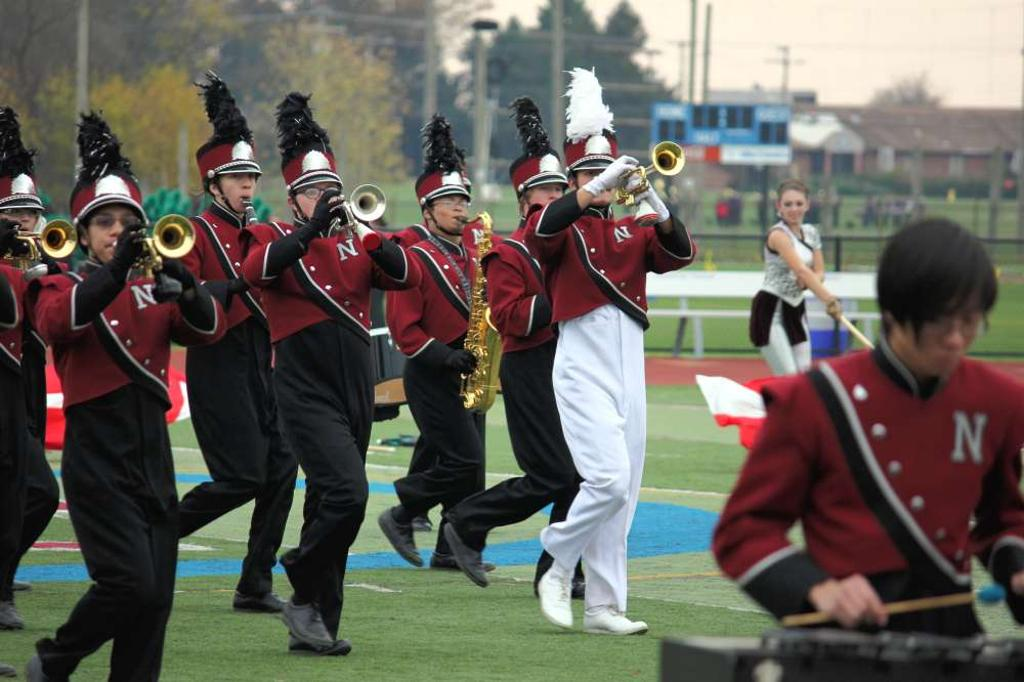

In [48]:
from IPython.display import Image
Image(filename="demo/data/0_Parade_marchingband_1_100.jpg")

Install EasyDict package:

In [40]:
!conda install -y -c auto easydict

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.12
  latest version: 4.8.2

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/ec2-user/anaconda3/envs/tensorflow_p27

  added / updated specs: 
    - easydict


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |           py27_0         156 KB
    easydict-1.4               |           py27_0           3 KB  auto
    ------------------------------------------------------------
                                           Total:         159 KB

The following NEW packages will be INSTALLED:

    easydict:        1.4-py27_0        auto

The following packages will be UPDATED:

    ca-certificates: 2019.10.16-0           --> 2020.1.1-0       
    certifi:         2019.9.11-py27_0       --> 

Create the output directory:

In [50]:
!mkdir -p demo/visualize

Execute the inference:

In [43]:
!./demo_tiny_resnet101.sh


Called with args:
Namespace(cfg_file='./cfgs/tiny_resnet101.yml', gpu_id=0, model='./output/Resnet101_tiny/', network_name='Resnet101_test', refBox='./data/RefBox_N25_scaled.mat')
./lib/tiny/config.py:111: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  yaml_cfg = edict(yaml.load(f))
Using config:
{'DEMO': {'CONFIDENCE_Thresh': 0.5,
          'DRAW_SCORE_COLORBAR': True,
          'MAX_INPUT_DIM': 5000,
          'NMS_Thresh': 0.1,
          'PRUNING': True,
          'VISUALIZE': True},
 'RGB_MEANS': array([119.2996 , 110.54627, 101.83843], dtype=float32),
 'RGB_VARIANCE': array([[ 0.7421559 , -1.3868568 ,  0.69416434],
       [ 2.6491976 ,  0.08836862, -2.6558025 ],
       [ 7.305443  ,  7.6848936 ,  7.54298   ]], dtype=float32),
 'TEST': {'CONFIDENCE_Thresh': 0.03,
          'GEN_PR_CURVE_TXT': True,
          'NMS_Thresh': 0.3,
          'PRUNING': True,
          'R

Visualize the inference result:

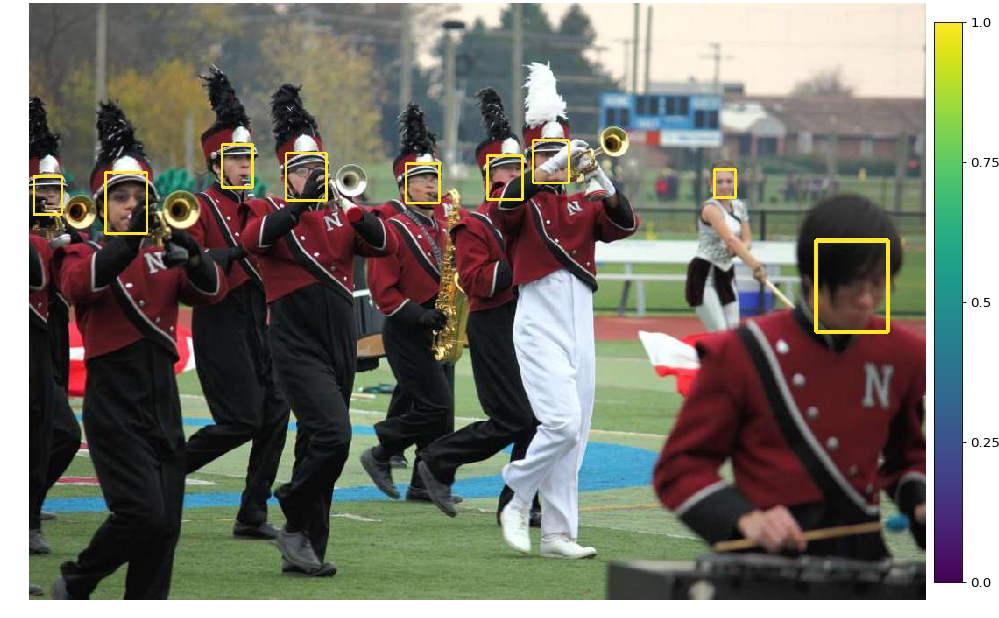

In [51]:
Image(filename="demo/visualize/0_Parade_marchingband_1_100.png")

# Training

Ensure the pickle file `wider_train_roidb_detail.pkl` is present:

In [53]:
!file data/pickles/wider_train_roidb_detail.pkl

data/pickles/wider_train_roidb_detail.pkl: data


Download the [Imagenet pretrained model](https://drive.google.com/open?id=1in08YStK2sUEirj8VCtgSB_ADZZJ36-b) (170Mb):

In [55]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1in08YStK2sUEirj8VCtgSB_ADZZJ36-b' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1in08YStK2sUEirj8VCtgSB_ADZZJ36-b" -O Resnet101.npy && rm -rf /tmp/cookies.txt

--2020-02-25 14:31:22--  https://docs.google.com/uc?export=download&confirm=4UPz&id=1in08YStK2sUEirj8VCtgSB_ADZZJ36-b
Resolving docs.google.com (docs.google.com)... 74.125.193.113, 74.125.193.100, 74.125.193.139, ...
Connecting to docs.google.com (docs.google.com)|74.125.193.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-00-58-docs.googleusercontent.com/docs/securesc/4cin8acfcrhqs7703961jr7uo66ra5aj/dfr8pukugcf3er0m88qbkfgfps83ievv/1582641000000/04077947909793347415/16590526818032389976Z/1in08YStK2sUEirj8VCtgSB_ADZZJ36-b?e=download [following]
--2020-02-25 14:31:22--  https://doc-00-58-docs.googleusercontent.com/docs/securesc/4cin8acfcrhqs7703961jr7uo66ra5aj/dfr8pukugcf3er0m88qbkfgfps83ievv/1582641000000/04077947909793347415/16590526818032389976Z/1in08YStK2sUEirj8VCtgSB_ADZZJ36-b?e=download
Resolving doc-00-58-docs.googleusercontent.com (doc-00-58-docs.googleusercontent.com)... 209.85.203.132, 2a00:1450:400b:c01::84
Connecting

In [57]:
!mkdir -p data/pretrain_model && mv Resnet101.npy data/pretrain_model

Run the training script:

In [ ]:
!./tiny_resnet101_wider_train.sh


Called with args:
Namespace(cfg_file='./cfgs/tiny_resnet101.yml', gpu_id=0, log_dir='log', max_epochs=50, network_name='Resnet101_train', output_dir='output', pkl_name='./data/pickles/wider_train_roidb_detail.pkl', pretrained_model='./data/pretrain_model/Resnet101.npy', refBox='./data/RefBox_N25_scaled.mat', restore=0, restore_dir=None)
./lib/tiny/config.py:111: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  yaml_cfg = edict(yaml.load(f))
Using config:
{'DEMO': {'CONFIDENCE_Thresh': 0.5,
          'DRAW_SCORE_COLORBAR': True,
          'MAX_INPUT_DIM': 5000,
          'NMS_Thresh': 0.1,
          'PRUNING': True,
          'VISUALIZE': True},
 'RGB_MEANS': array([119.2996 , 110.54627, 101.83843], dtype=float32),
 'RGB_VARIANCE': array([[ 0.7421559 , -1.3868568 ,  0.69416434],
       [ 2.6491976 ,  0.08836862, -2.6558025 ],
       [ 7.305443  ,  7.6848936 ,  7.54298   ]]

TODO:
- add all the code into Git.
- find out how to do the inference;
- find out why how to use GPU in the training, nvidia-smi doesn't see any GPU device;
- create a script `google-download.sh <file-id>` to simplify the downloading process.

In [67]:
import numpy as np
data_dict = np.load('./data/pretrain_model/Resnet101.npy', allow_pickle=True).item()

In [60]:
!file ./data/pretrain_model/Resnet101.npy

./data/pretrain_model/Resnet101.npy: NumPy array, version 1.0, header length 70
